<center><img src = 'https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true' width="240" height="180"></center>

# ML on Voice Gender Recognition

<center><img src="https://github.com/Shailee06/Images/blob/main/HumanVoice1.jpg?raw=true" width="2400" height="1800" align='left'><br/></center>


---
# **Table of Contents**
---

**1.** [**Problem Statement**](#Section1)<br>
**2.** [**Objective**](#Section2)<br>
**3.** [**Importing Libraries**](#Section3)<br>

**4.** [**Data Import & Description**](#Section4)<br>
  - **4.1** [**Data Import**](#Section41)
  - **4.2** [**Data Description**](#Section42)

**5.** [**Data Analysis/Processing & Feature Selection**](#Section5)<br>
  - **5.1** [**Data Processing**](#Section51)<br>
  - **5.2** [**Exploratory Data Analysis**](#Section52)<br>
  - **5.3** [**Data Preparation**](#Section53)<br>

**6.** [**Pre Model Development & Evaluation**](#Section6)<br> 
  - **6.1** [**Model Evaluation Plots**](#Section61)<br>
  - **6.2** [**Support Vector Machine Classifier - RBF Kernel**](#Section62)<br>
  - **6.3** [**Model Evaluation**](#Section63)<br>
    
**7.** [**Scaling & PCA**](#Section7)<br>
  - **7.1** [**Standard Scaler**](#Section71)<br>
  - **7.2** [**Principal Component Analysis**](#Section72)<br>
  - **7.3** [**Post Data Preparation**](#Section73)<br>
  
**8.** [**Post Model Development & Evaluation**](#Section8)<br>
  - **8.1** [**Support Vector Machine Classifier - RBF Kernel**](#Section81)<br>
  - **8.2** [**Support Vector Machine Classifier - Sigmoid Kernel**](#Section82)<br>
  - **8.3** [**Support Vector Machine Classifier - Polynomial Kernel**](#Section83)<br>
  - **8.4** [**K Nearest Neighbour Classifier**](#Section84)<br>

**9.** [**Conclusion**](#Section9)<br>



---
<a name = Section1></a>
# **1. Problem Statement**
---

- The **database** was created to **identify** a voice as **male or female**, based upon acoustic properties of the **voice and speech**.

- The dataset consists of **3,168 recorded voice samples**, collected from male and female speakers. 

- The voice samples are **pre-processed by acoustic analysis** in R using the seewave and tuneR packages.

- Additionally, samples have been analyzed with **frequency range** of **0Hz-280Hz** (human vocal range).

---
<a name = Section2></a>
# **2. Objective**
---

- The objective of this assignment is to **predict** the **gender** based on the voice features.

---
<a name = Section3></a>
# **3. Importing Libraries**
---

In [1]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
from sklearn.preprocessing import StandardScaler                    # To scale the data with mean = 0 and std = 1
from sklearn.decomposition import PCA
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib                                              
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
from sklearn.metrics import classification_report                   # To generate complete report of evaluation metrics
from sklearn.metrics import plot_confusion_matrix                   # To plot confusion matrix 
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler                    # For Scaling attributes using Standard Scaler     
from sklearn.decomposition import PCA                               # To implement PCA on the dataset
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.svm import SVC                                         # To create model for support vector classifier
from sklearn.naive_bayes import MultinomialNB                       # To create a naive bayes model using algorithm
from sklearn.neighbors import KNeighborsClassifier
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

---
<a name = Section4></a>
# **4. Data Import & Description**
---

The following acoustic properties of each voice are measured and included within the dataset: <br>
•	meanfreq: mean frequency (in kHz)<br>
•	sd: standard deviation of frequency<br>
•	median: median frequency (in kHz)<br>
•	Q25: first quantile (in kHz)<br>
•	Q75: third quantile (in kHz)<br>
•	IQR: interquantile range (in kHz)<br>
•	skew: skewness (see note in specprop description)<br>
•	kurt: kurtosis (see note in specprop description)<br>
•	sp.ent: spectral entropy<br>
•	sfm: spectral flatness<br>
•	mode: mode frequency<br>
•	centroid: frequency centroid (see specprop)<br>
•	peakf: peak frequency (frequency with highest energy)<br>
•	meanfun: average of fundamental frequency measured across acoustic signal<br>
•	minfun: minimum fundamental frequency measured across acoustic signal<br>
•	maxfun: maximum fundamental frequency measured across acoustic signal<br>
•	meandom: average of dominant frequency measured across acoustic signal<br>
•	mindom: minimum of dominant frequency measured across acoustic signal<br>
•	maxdom: maximum of dominant frequency measured across acoustic signal<br>
•	dfrange: range of dominant frequency measured across acoustic signal<br>
•	modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range<br>
•	label: male or female


<a name = Section41></a>
### **4.1 Data Import**

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-3/master/Projects/gender_recognition_by_voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


<a name = Section42></a>
### **4.2 Data Description**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

**Observation:**

- We can see that there are **no null values present** inside our data.

- We can also see that all the **features** are having **correct data type**.

In [4]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


<a name = Section5></a>

---
# **5. Data Analysis/Processing & Feature Selection**
---

<a name = Section51></a>
### **5.1 Data Processing**

- Data Information reveals that there is no missing data and all attributes except Label are numeric

- Data Description depicts that attributes have normal distribution

In [5]:
def handle_duplicates(data):

  before_shape = data.shape
  print('Data Shape [Before]:', before_shape)

  data.drop_duplicates(inplace = True)

  after_shape = data.shape
  print('Data Shape [After]:', after_shape)

  drop_nums = before_shape[0] - after_shape[0]
  drop_percent = np.round(drop_nums / before_shape[0], decimals = 5) * 100

  print('Drop Ratio:', drop_percent, '%')

In [6]:
handle_duplicates(df)

Data Shape [Before]: (3168, 21)
Data Shape [After]: (3166, 21)
Drop Ratio: 0.063 %


**Observation:**

- We have successfully handled duplicate data.

<a name = Section52></a>
### **5.2 Exploratory Data Analysis**

In [7]:
df.label.value_counts()

male      1583
female    1583
Name: label, dtype: int64

In [8]:
def plotLabel():
  colors_list = ['pink', 'blue']
  figure = plt.figure(figsize = [13.66, 7.3])
  plt.subplot(1, 2, 1)
  sns.barplot(df['label'].value_counts().index, df['label'].value_counts(), palette  = colors_list)
  plt.xlabel('Transaction Type', size = 14)
  plt.ylabel('Frequency', size = 14)
  plt.title('Frequency occurence of each transaction type', y=1.05, size = 16)

  explode_list = [0.1, 0]

  plt.subplot(1, 2, 2)
  df['label'].value_counts().plot(kind='pie', figsize=[13.66, 7.3], autopct='%1.1f%%', 
                                        startangle=90, shadow=True, labels=None, pctdistance=1.12, colors=colors_list, explode=explode_list)
  plt.title('Proportion of each transaction type', y=1.05, size = 16)
  plt.ylabel('')
  plt.axis('equal')
  plt.legend(labels = df['label'].value_counts().index, loc = 'upper left', frameon=False)
  plt.tight_layout(pad=2.0)
  plt.show()

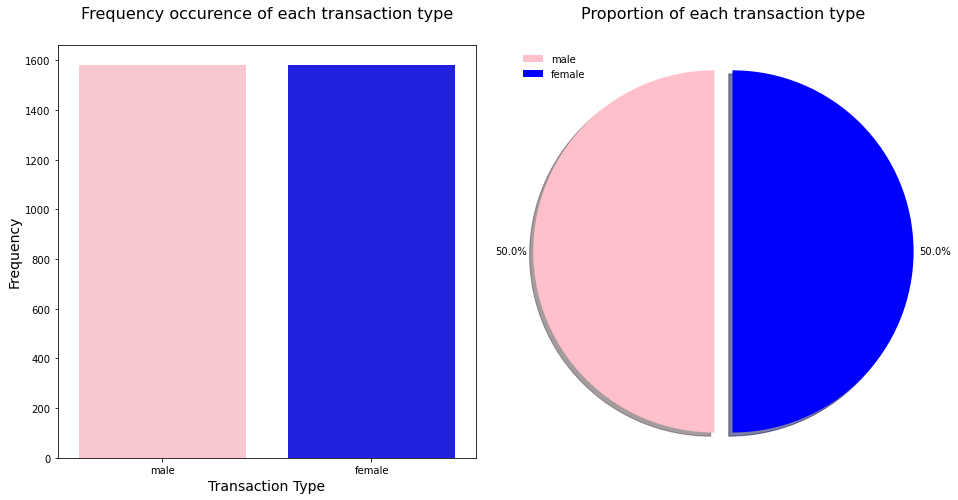

In [9]:
plotLabel()

**Observation:**

- We can see that our feature of interest is normally distributed

- Its evident that the dataset is balanced

<a name = Section53></a>
### **5.3 Data Preparation**

In [10]:
X = pd.DataFrame()
def generate():
    X = df.loc[:, df.columns != 'label']
    return X
X = generate()

In [11]:
y = pd.DataFrame()
def generate():
    y = df.loc[:,df.columns == 'label']
    return y
y = generate()

In [12]:
X.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [13]:
def generate():
    return train_test_split(X, y, test_size=0.25, random_state=1) 
X_train, X_test, y_train, y_test = generate()

In [14]:
def generate():
    print(X_train.shape)
    print(y_train.shape)
generate()

(2374, 20)
(2374, 1)


In [15]:
def generate():
    print(X_test.shape)
    print(y_test.shape)
generate()

(792, 20)
(792, 1)


<a name = Section6></a>

---
# **6. Pre Model Development & Evaluation**
---

<a name = Section61></a>
### **6.1 Model Evaluation Plots**

In [16]:
def plot_precision_recall(y_true, y_pred, train_or_test):
  '''
  y_true: Acutal values of the target
  y_pred: Predicted values of the target. Either predict_proba or decision_function
  line_show: Plot avergae values "precision" or "recall"
  train_or_test: Train Data or Test Data
  '''
  precisions, recalls, thresholds = precision_recall_curve(y_true = y_true, probas_pred = y_pred)

  average_precision = np.mean(precisions)
  average_recall = np.mean(recalls)

  sns.lineplot(x = recalls, y = precisions, linewidth = 2, ci = None)
  plt.plot([0, 1], [average_precision, average_precision], 'r-')
  plt.plot([average_recall, average_recall], [0, 1], 'g-')
  plt.xlabel('Recall', fontsize = 14)
  plt.xticks(ticks = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
  plt.yticks(ticks = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
  plt.ylabel('Precision', fontsize = 14)
  plt.title(train_or_test, fontsize = 16)
  plt.legend(labels = ['Binary PR Curve', 'AP {:.2f}'.format(average_precision), 'AR {:.2f}'.format(average_recall)])
  plt.grid(True)

In [17]:
def plotConfusion(model = None):

  fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = False, figsize=(15, 7))

  plot_confusion_matrix(estimator = model, X = X_train, y_true = y_train, values_format = '.7g', cmap = 'YlGnBu', ax = ax1)
  plot_confusion_matrix(estimator = model, X = X_test, y_true = y_test, values_format = '.7g', cmap = 'YlGnBu', ax = ax2)
  
  ax1.set_title(label = 'Train Data', size = 14)
  ax2.set_title(label = 'Test Data', size = 14)
  ax1.grid(b = False)
  ax2.grid(b = False)
  plt.suptitle(t = 'Confusion Matrix', size = 16)
  plt.show()

In [18]:
def plotClassificationReport(model = None):

  y_train_pred_count = model.predict(X_train)
  y_test_pred_count = model.predict(X_test)

  logistic_report_train = classification_report(y_train, y_train_pred_count)
  logistic_report_test = classification_report(y_test, y_test_pred_count)
  print('                    Training Report          ')
  print(logistic_report_train)
  print('                    Testing Report           ')
  print(logistic_report_test)

<a name = Section62></a>
### **6.2 Pre Model Development**

In [19]:
def modelFit():
  
  # To plot confusion matrix probability = True is required
  svc = SVC(probability = True, kernel = 'rbf')
  svc.fit(X_train, y_train)

  return svc

# Calling fit over default setting
model = modelFit()

<a name = Section63></a>
### **6.3 Model Evaluation**

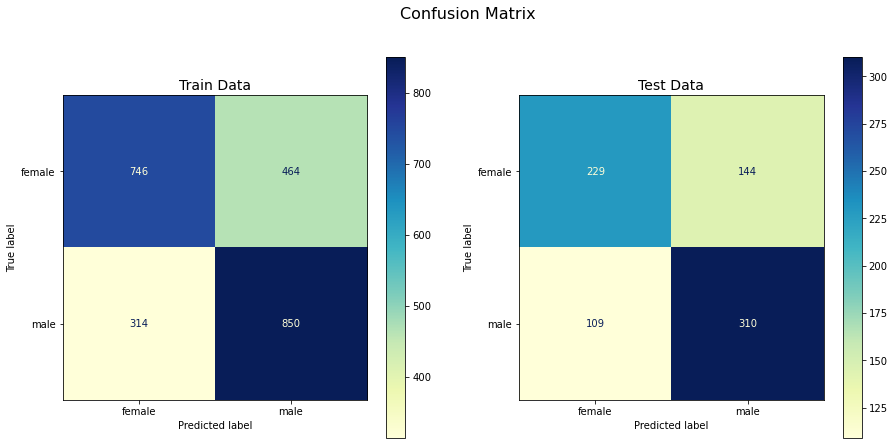

In [20]:
# Calling User Defined Function to plot confusion matrix
plotConfusion(model = model)

In [21]:
plotClassificationReport(model = model)

                    Training Report          
              precision    recall  f1-score   support

      female       0.70      0.62      0.66      1210
        male       0.65      0.73      0.69      1164

    accuracy                           0.67      2374
   macro avg       0.68      0.67      0.67      2374
weighted avg       0.68      0.67      0.67      2374

                    Testing Report           
              precision    recall  f1-score   support

      female       0.68      0.61      0.64       373
        male       0.68      0.74      0.71       419

    accuracy                           0.68       792
   macro avg       0.68      0.68      0.68       792
weighted avg       0.68      0.68      0.68       792



<a name = Section7></a>

---
# **7. Scaling & PCA**
---

<a name = Section71></a>
### **7.1 Standard Scaler**

In [22]:
def generate():
    standardized = StandardScaler()
    standardized.fit(X)
    return standardized.transform(X)
X = generate()

<a name = Section72></a>
### **7.2 Principal Component Analysis**

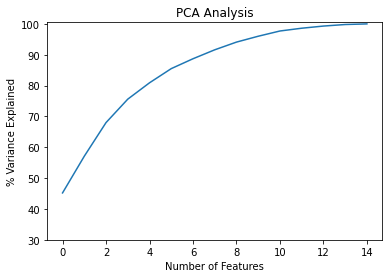

In [23]:
def generate():

    pca = PCA(15, random_state=0)
    pca.fit(X)
    
    var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)

    plt.ylabel('% Variance Explained')
    plt.xlabel('Number of Features')
    plt.title('PCA Analysis')
    plt.ylim(30,100.5)
    plt.style.context('seaborn-whitegrid')

    plt.plot(var)

    return plt.show()
generate()

In [24]:
def generate():
    pca = PCA(n_components=10, random_state=0)
    pca.fit(X)
    return pca.transform(X)
X = generate()
print(X.shape)

(3166, 10)


<a name = Section73></a>
### **7.3 Post Data Preparation**

In [25]:
def generate():
    return train_test_split(X, y, test_size=0.25, random_state=1) 
X_train, X_test, y_train, y_test = generate()

In [26]:
print(X_train.shape,X_test.shape)

(2374, 10) (792, 10)


<a name = Section8></a>

---
# **8. Post Model Development & Evaluation**
---

<a name = Section81></a>
### **8.1 Support Vector Machine Classifier - RBF Kernel**

In [27]:
def modelFit1():
  
  # To plot confusion matrix probability = True is required
  svc = SVC(probability = True, kernel = 'rbf')
  svc.fit(X_train, y_train)

  return svc

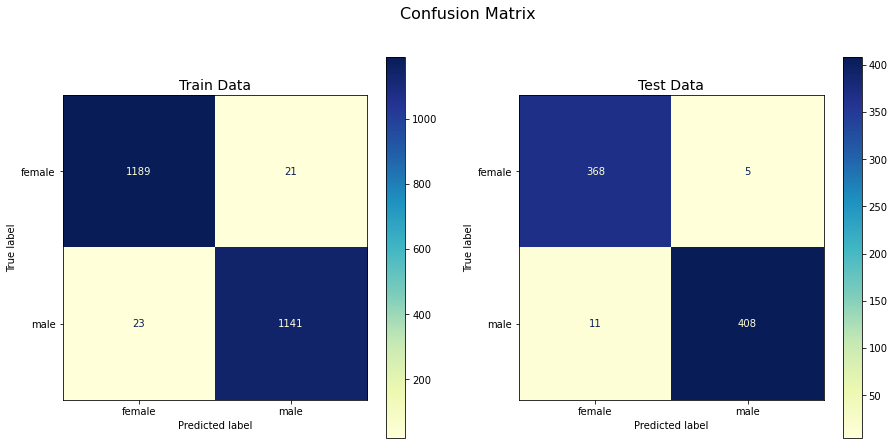

In [28]:
# Calling fit over default setting
model1 = modelFit1()

# Calling User Defined Function to plot confusion matrix
plotConfusion(model = model1)

In [29]:
plotClassificationReport(model = model1)

                    Training Report          
              precision    recall  f1-score   support

      female       0.98      0.98      0.98      1210
        male       0.98      0.98      0.98      1164

    accuracy                           0.98      2374
   macro avg       0.98      0.98      0.98      2374
weighted avg       0.98      0.98      0.98      2374

                    Testing Report           
              precision    recall  f1-score   support

      female       0.97      0.99      0.98       373
        male       0.99      0.97      0.98       419

    accuracy                           0.98       792
   macro avg       0.98      0.98      0.98       792
weighted avg       0.98      0.98      0.98       792



**Observation:**

- We can see pretty **good results** using **RBF kernel**.

- The **accuracy** on both training and testing data is pretty good i.e. **98%**.

- Additionally, the **Precision and Recall scores** are also **good** on both training data as well as on testing data.

<a name = Section82></a>
### **8.2 Support Vector Machine Classifier - Sigmoid Kernel**

In [30]:
def modelFit2():
  
  # To plot confusion matrix probability = True is required
  svc = SVC(kernel = 'sigmoid', probability = True)
  svc.fit(X_train, y_train)

  return svc

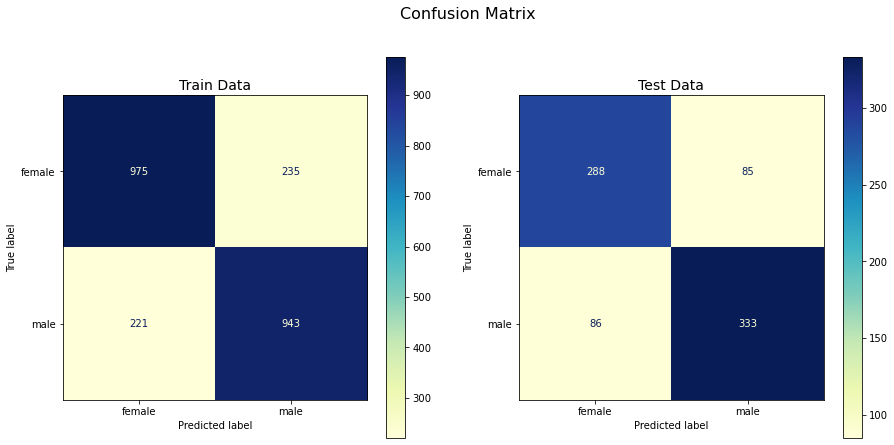

                    Training Report          
              precision    recall  f1-score   support

      female       0.82      0.81      0.81      1210
        male       0.80      0.81      0.81      1164

    accuracy                           0.81      2374
   macro avg       0.81      0.81      0.81      2374
weighted avg       0.81      0.81      0.81      2374

                    Testing Report           
              precision    recall  f1-score   support

      female       0.77      0.77      0.77       373
        male       0.80      0.79      0.80       419

    accuracy                           0.78       792
   macro avg       0.78      0.78      0.78       792
weighted avg       0.78      0.78      0.78       792



In [31]:
# Calling fit over default setting
model2 = modelFit2()

# Calling User Defined Function to plot confusion matrix
plotConfusion(model = model2)
plotClassificationReport(model = model2)

**Observation:**

- We can see **good results** using **Sigmoid kernel** but **not that good** as that of **RBF kernel**.

- The **accuracy** on both training and testing data is around **80%** which is pretty low.

- Additionally, the **Precision and Recall scores** are also **okay** on both training data as well as on testing data.

<a name = Section83></a>
### **8.3 Support Vector Machine Classifier - Polynomial Kernel**

In [32]:
def modelFit3():
  
  # To plot confusion matrix probability = True is required
  svc = SVC(kernel = 'poly', probability = True)
  svc.fit(X_train, y_train)

  return svc

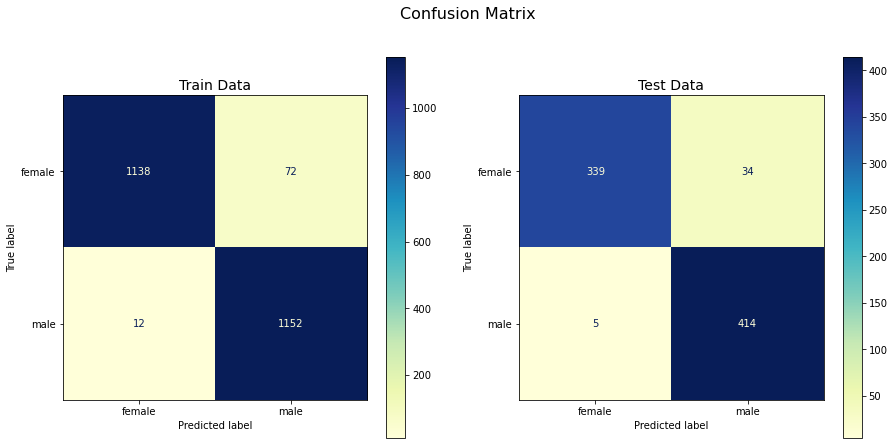

                    Training Report          
              precision    recall  f1-score   support

      female       0.99      0.94      0.96      1210
        male       0.94      0.99      0.96      1164

    accuracy                           0.96      2374
   macro avg       0.97      0.97      0.96      2374
weighted avg       0.97      0.96      0.96      2374

                    Testing Report           
              precision    recall  f1-score   support

      female       0.99      0.91      0.95       373
        male       0.92      0.99      0.96       419

    accuracy                           0.95       792
   macro avg       0.95      0.95      0.95       792
weighted avg       0.95      0.95      0.95       792



In [33]:
# Calling fit over default setting
model3 = modelFit3()

# Calling User Defined Function to plot confusion matrix
plotConfusion(model = model3)
plotClassificationReport(model = model3)

**Observation:**

- We can see **good results** using **SVC - Polynomial kernel** but **not that good** as that of **SVC - RBF kernel**.

- The **accuracy** on both training and testing data is around **95%** which is okay.

- Additionally, the **Precision and Recall scores** are also **okay** on both training data as well as on testing data, recall being highest for male.

<a name = Section84></a>
### **8.4 K Nearest Neighbour Classifier**

In [34]:
def modelFit4():
    knn_model1 = KNeighborsClassifier(n_neighbors = 1)
    knn_model1.fit(X_train, y_train)
    return knn_model1

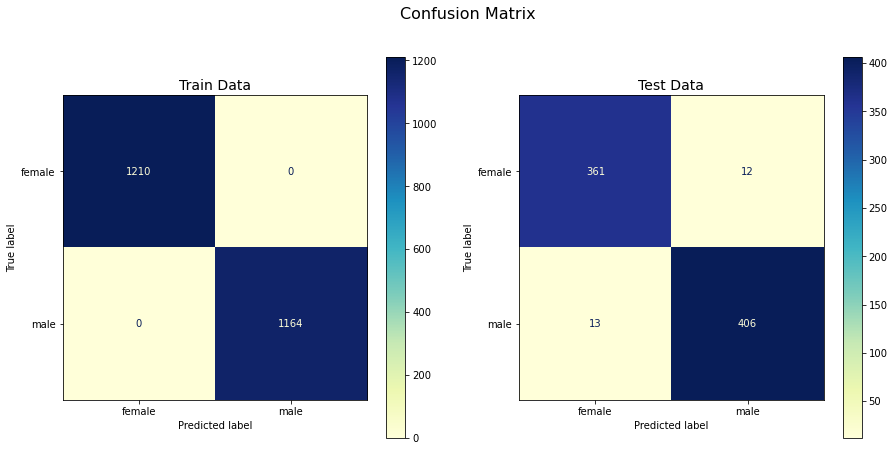

                    Training Report          
              precision    recall  f1-score   support

      female       1.00      1.00      1.00      1210
        male       1.00      1.00      1.00      1164

    accuracy                           1.00      2374
   macro avg       1.00      1.00      1.00      2374
weighted avg       1.00      1.00      1.00      2374

                    Testing Report           
              precision    recall  f1-score   support

      female       0.97      0.97      0.97       373
        male       0.97      0.97      0.97       419

    accuracy                           0.97       792
   macro avg       0.97      0.97      0.97       792
weighted avg       0.97      0.97      0.97       792



In [35]:
# Calling fit over default setting
model4 = modelFit4()

# Calling User Defined Function to plot confusion matrix
plotConfusion(model = model4)
plotClassificationReport(model = model4)

**Observation:**

- We can see **good results** using **KNN** but **not that good** as that of **SVC - RBF kernel**.

- The **accuracy** on both training and testing data is around **97%** which is okay.

- Additionally, the **Precision and Recall scores** are also **okay** on both training data as well as on testing data.

<a name = Section9></a>

---
# **9. Conclusion**
---


- The analysis reveals the Human gender based on voice properties

- We see the impact of Scaling and PCA on same model. There is a major improvement in model evaluation scores pre and post Scaling and PCA

- The final predictions were pretty good for **SVC-rbf**, **SVC-polynomial** and **KNN** algorithms

- Based on highest Accuracy and F1 score, we finalized **SVC using rbf setting**

<center><img src="https://github.com/Shailee06/Images/blob/main/HumanVoice3.jpg?raw=true" width="2400" height="1800" align='left'><br/></center>